# Agglomerative Clustering

## Load Libraries and Data

In [1]:
import io
import requests
import warnings
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons, make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from scipy.cluster.hierarchy import dendrogram
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter
import seaborn as sns

# Suppress matplotlib deprecation warnings
warnings.filterwarnings('ignore')

# Make this notebook's output stable across runs
random_state = 1000
np.random.seed(random_state)

# Plot formatting
%matplotlib inline
sns.set()
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

### Load Mall Customer Data

In [2]:
# Cluster on spend and income
url = 'https://raw.githubusercontent.com/natecraig/aiml/main/Data/mall.csv'
download = requests.get(url).content
df = pd.read_csv(io.StringIO(download.decode('utf-8')))
X = df[['Income', 'Spend']]

scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

## Agglomerative Clustering on Mall Customer Data

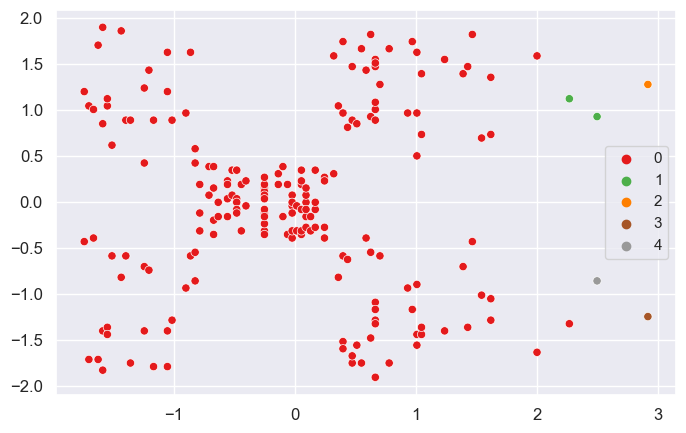

In [3]:
# Cluster using 'single' linkage and plot the results
agg = AgglomerativeClustering(n_clusters=5, linkage='single')
agg.fit(X_scale)

plt.subplots(figsize=(8, 5))
sns.scatterplot(x=X_scale[:, 0], y=X_scale[:, 1], hue=agg.labels_,
                palette=sns.color_palette('Set1', as_cmap=True))
plt.show()

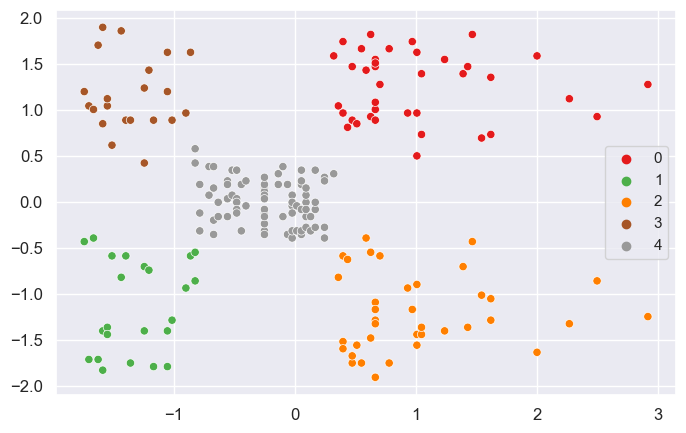

In [4]:
# Cluster using 'complete' linkage and plot the results
agg = AgglomerativeClustering(n_clusters=5, linkage='complete')
agg.fit(X_scale)

plt.subplots(figsize=(8, 5))
sns.scatterplot(x=X_scale[:, 0], y=X_scale[:, 1], hue=agg.labels_,
                palette=sns.color_palette('Set1', as_cmap=True))
plt.show()

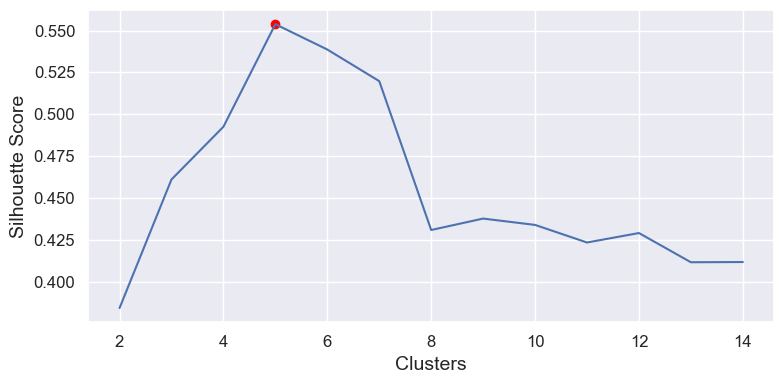

In [5]:
# Fit agglomerative clustering for different numbers of clusters
ks = range(2, 15)
agg_per_k = [AgglomerativeClustering(n_clusters=k).fit(X_scale)
             for k in ks]
silhouettes = [silhouette_score(X_scale, m.labels_)
               for m in agg_per_k]

# Plot results for different numbers of clusters
plt.subplots(figsize=(8, 4))

plt.plot(ks, silhouettes)
plt.scatter(5, silhouettes[3], color='red')

plt.xlabel('Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

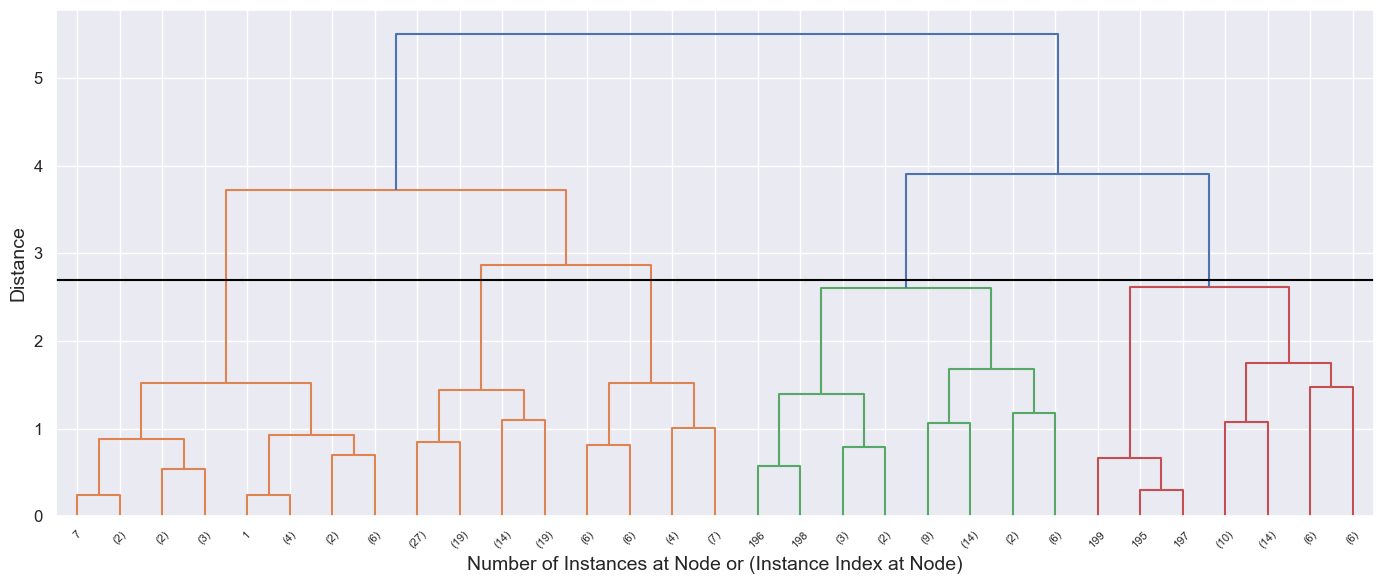

In [6]:
# Plot a dendrogram of the agglomerative clustering results
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)

    
# Plot the upper levels of the dendrogram
plt.subplots(figsize=(14, 6))
agg = AgglomerativeClustering(linkage='complete', distance_threshold=0,
                              n_clusters=None)
plot_dendrogram(agg.fit(X_scale), truncate_mode='level', p=4)

plt.hlines(2.7, *plt.xlim(), color='black')
plt.xlabel('Number of Instances at Node or (Instance Index at Node)')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

## Agglomerative Clustering on Make_Moons

In [7]:
X, y = make_moons(n_samples=1000, noise=0.05) 

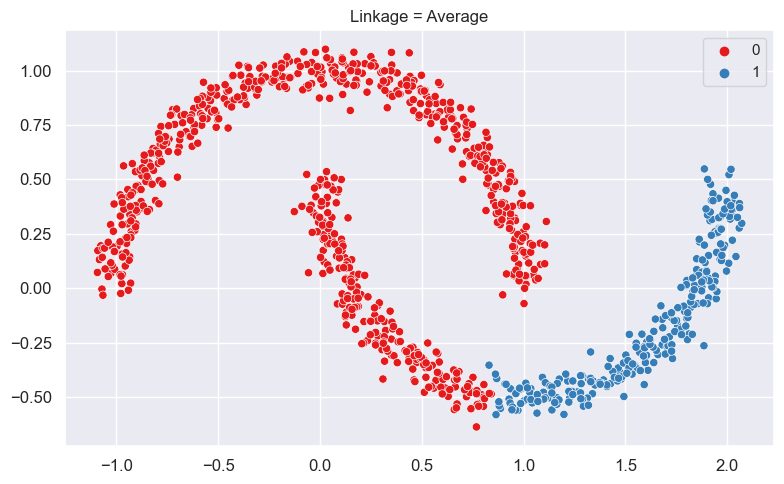

In [8]:
# Cluster using 'average' linkage and plot the results
agg = AgglomerativeClustering(n_clusters=2, linkage='average')
agg.fit(X)

plt.subplots(figsize=(8, 5))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=agg.labels_,
                palette=sns.color_palette('Set1', n_colors=2))
plt.title('Linkage = Average')

plt.tight_layout()
plt.show()

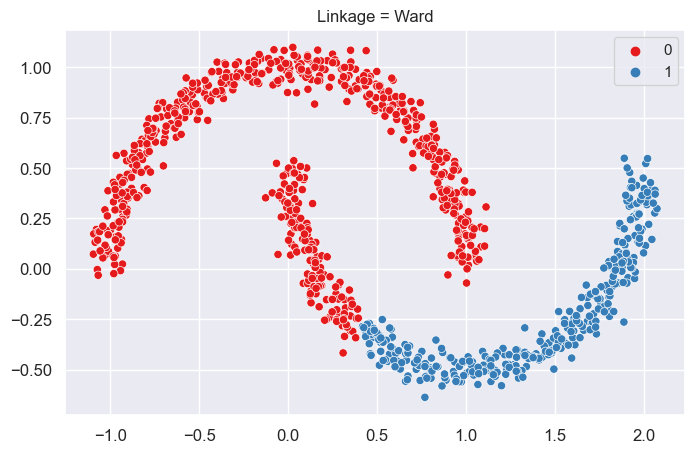

In [9]:
# Cluster using 'ward' linkage and plot the results
agg = AgglomerativeClustering(n_clusters=2, linkage='ward')
agg.fit(X)

plt.subplots(figsize=(8, 5))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=agg.labels_,
                palette=sns.color_palette('Set1', n_colors=2))
plt.title('Linkage = Ward')
plt.show()

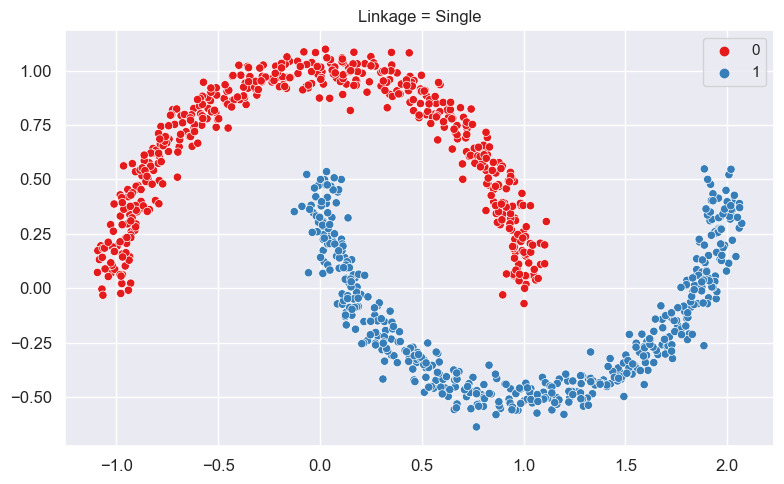

In [10]:
# Cluster using 'single' linkage and plot the results
agg = AgglomerativeClustering(n_clusters=2, linkage='single')
agg.fit(X)

plt.subplots(figsize=(8, 5))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=agg.labels_,
                palette=sns.color_palette('Set1', n_colors=2))
plt.title('Linkage = Single')

plt.tight_layout()
plt.show()

## Agglomerative Clustering with Irregular Shapes and Variance in Density

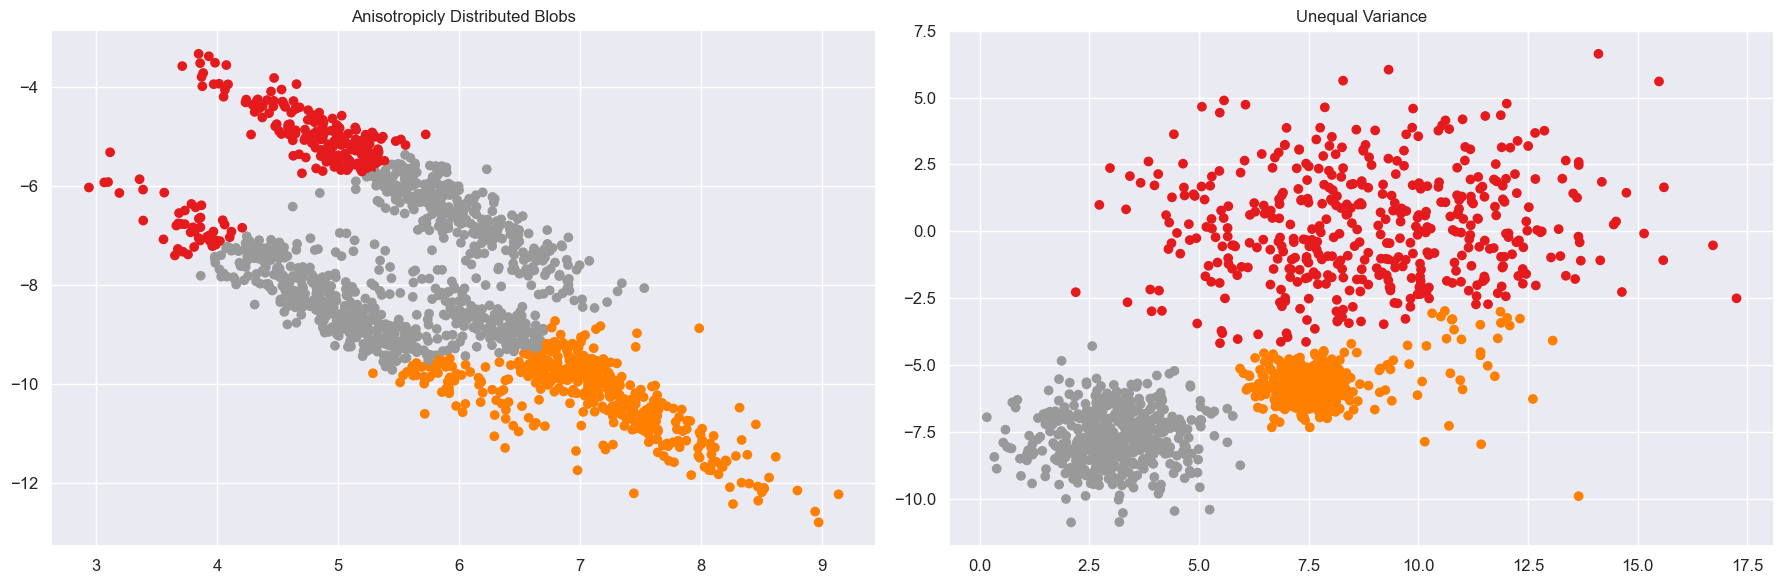

In [11]:
plt.figure(figsize=(18, 6))

n_samples = 1500
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = (AgglomerativeClustering(n_clusters=3, affinity='manhattan',
                                  linkage='average')
          .fit_predict(X_aniso))

plt.subplot(121)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred,
            cmap=sns.color_palette('Set1', as_cmap=True))
plt.title('Anisotropicly Distributed Blobs')

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = (AgglomerativeClustering(n_clusters=3, linkage='ward')
          .fit_predict(X_varied))

plt.subplot(122)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred,
            cmap=sns.color_palette('Set1', as_cmap=True))
plt.title('Unequal Variance')

plt.tight_layout()
plt.show()

### Exercise
Adjust the linkage and affinity parameters and observe how the cluster assignments change.